In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
# Suppress yfinance future warnings for cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# --- Step 1: Define Portfolio ---
# Mapped your exact stocks to Yahoo Finance NSE tickers
# TODO: Update the numbers with your actual share quantities!
portfolio = {
    "ADANIENSOL.NS": 10, "ADANIPOWER.NS": 15, "HIKAL.NS": 50,
    "KITEX.NS": 20, "ZAGGLE.NS": 25, "SGMART.NS": 5,
    "SGFIN.NS": 10, "PCBL.NS": 40, "GOKEX.NS": 15,
    "GRANULES.NS": 30, "PPLPHARMA.NS": 40, "EIDPARRY.NS": 25,
    "TEGA.NS": 10, "BHARTIARTL.NS": 15, "HDFCLIFE.NS": 20,
    "FEDERALBNK.NS": 50, "IDFCFIRSTB.NS": 100, "CSBBANK.NS": 30
}

In [4]:
tickers = list(portfolio.keys())
shares = pd.Series(portfolio)

In [5]:
# --- Step 2: Fetch Stock Data ---
print("📡 Fetching data from NSE... (This might take a few seconds)")
# Fetching 1 year of historical closing prices
data = yf.download(tickers, period="1y")['Close']

📡 Fetching data from NSE... (This might take a few seconds)


[*********************100%***********************]  18 of 18 completed


In [6]:
# --- Step 3: Calculate Metrics ---
# 1. Daily Portfolio Value
# Multiply the closing price of each stock by the number of shares, then sum across the row
portfolio_value = (data * shares).sum(axis=1)

In [7]:
# 2. Daily Returns
daily_returns = portfolio_value.pct_change().dropna()

In [8]:
# 3. Current Value & Gain/Loss
initial_value = portfolio_value.iloc[0]
current_value = portfolio_value.iloc[-1]
total_pnl = current_value - initial_value
total_pnl_pct = (total_pnl / initial_value) * 100

In [9]:
# 4. CAGR (Assuming 252 trading days in a year)
trading_days = len(portfolio_value)
years = trading_days / 252
cagr = ((current_value / initial_value) ** (1 / years)) - 1

In [10]:
# 5. Risk Analyzer: Sharpe Ratio (Assuming a 7% Risk-Free Rate in India)
risk_free_rate = 0.07
daily_rf = risk_free_rate / 252
excess_returns = daily_returns - daily_rf
sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)

In [11]:
# 6. Current Allocation %
current_prices = data.iloc[-1]
current_holdings_value = current_prices * shares
allocation_pct = (current_holdings_value / current_value) * 100

In [12]:
# --- Print Summary ---
print("\n📊 --- PORTFOLIO DASHBOARD ---")
print(f"💰 Current Value: ₹{current_value:,.2f}")
print(f"📈 Total Gain/Loss: ₹{total_pnl:,.2f} ({total_pnl_pct:.2f}%)")
print(f"🚀 CAGR: {cagr * 100:.2f}%")
print(f"⚖️  Sharpe Ratio: {sharpe_ratio:.2f}")
print("\n🥧 Top 5 Holdings by Allocation:")
print(allocation_pct.sort_values(ascending=False).head(5).apply(lambda x: f"{x:.2f}%"))
print("-------------------------------\n")


📊 --- PORTFOLIO DASHBOARD ---
💰 Current Value: ₹202,255.95
📈 Total Gain/Loss: ₹21,880.84 (12.13%)
🚀 CAGR: 12.34%
⚖️  Sharpe Ratio: 0.32

🥧 Top 5 Holdings by Allocation:
BHARTIARTL.NS    14.30%
EIDPARRY.NS      10.75%
TEGA.NS           8.93%
GRANULES.NS       8.92%
FEDERALBNK.NS     7.38%
dtype: object
-------------------------------



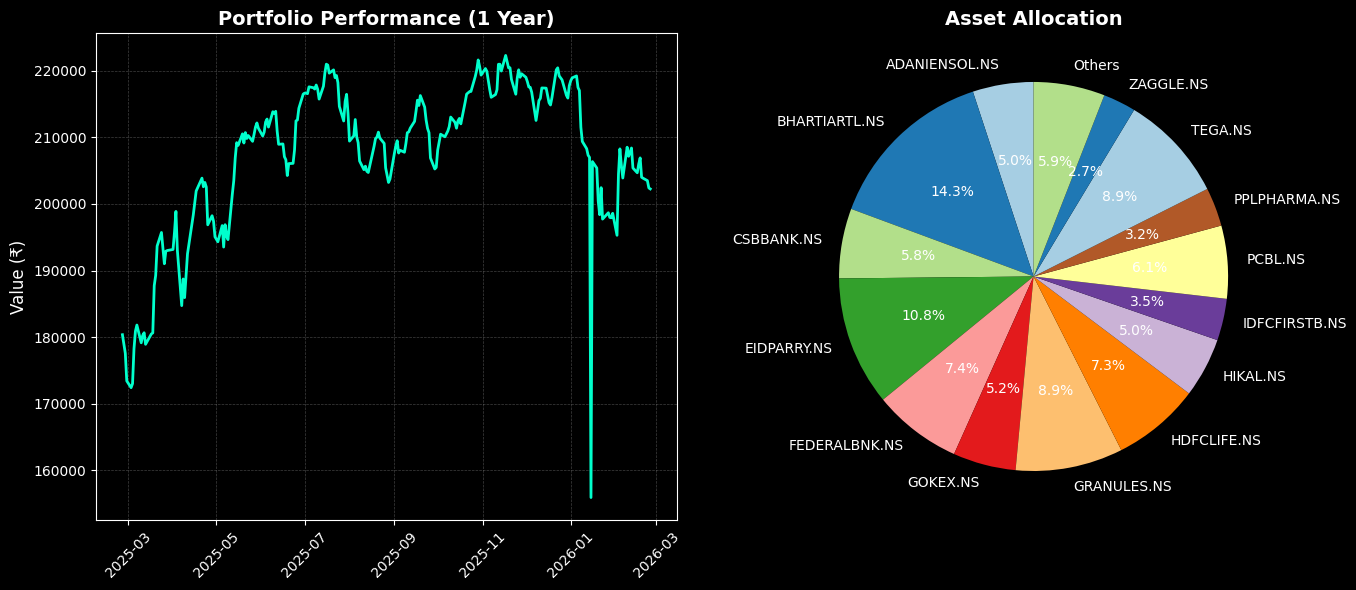

In [15]:
# --- Step 4: Plot Performance ---
plt.style.use('dark_background') # Better for screens!
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Line Chart: Portfolio Value Over Time
ax1.plot(portfolio_value.index, portfolio_value.values, color='#00ffcc', linewidth=2)
ax1.set_title("Portfolio Performance (1 Year)", fontsize=14, fontweight='bold')
ax1.set_ylabel("Value (₹)", fontsize=12)
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
ax1.tick_params(axis='x', rotation=45)

# Pie Chart: Current Allocation (Filtering out tiny allocations for visual clarity)
top_allocations = allocation_pct[allocation_pct > 2]
other_allocations = pd.Series({'Others': allocation_pct[allocation_pct <= 2].sum()})
plot_allocations = pd.concat([top_allocations, other_allocations])

ax2.pie(plot_allocations, labels=plot_allocations.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Paired.colors)
ax2.set_title("Asset Allocation", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()